In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Expand dimensions to match CNN input format (batch, height, width, channels)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Convert labels to categorical (one-hot encoding)
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [4]:
# Define model with explicit input
input_layer = Input(shape=(28, 28, 1))  # Define input explicitly
conv_layer = Conv2D(filters=3, kernel_size=(3, 3), activation=None, name="conv_layer")(input_layer)
flatten_layer = Flatten()(conv_layer)
output_layer = Dense(10, activation="softmax")(flatten_layer)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05), loss="categorical_crossentropy", metrics=["accuracy"])


In [6]:
# Get initial filter weights (before training)
conv_layer = model.get_layer("conv_layer")  # Get convolutional layer
initial_weights = conv_layer.get_weights()[0]  # Extract filter weights (shape: 3x3x1x3)


In [8]:
# Train the model for 20 epochs
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8237 - loss: 1.0549 - val_accuracy: 0.8591 - val_loss: 1.2980
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8445 - loss: 1.4052 - val_accuracy: 0.8684 - val_loss: 1.1741
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8564 - loss: 1.4530 - val_accuracy: 0.8597 - val_loss: 0.6419
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8755 - loss: 0.9196 - val_accuracy: 0.8723 - val_loss: 0.7075
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8675 - loss: 1.1606 - val_accuracy: 0.8936 - val_loss: 1.0474
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8606 - loss: 1.2587 - val_accuracy: 0.8756 - val_loss: 0.9329
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8653 - loss: 1.9725 - val_accuracy: 0.8409 - val_loss: 1.3967
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8792 - loss: 1.01

In [9]:
# Get final filter weights (after training)
final_weights = conv_layer.get_weights()[0]  # Extract updated filter weights

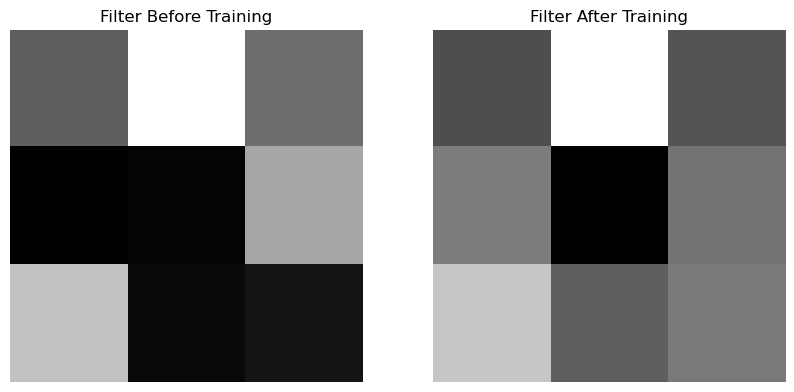

In [10]:
# Select one filter (e.g., first filter)
filter_index = 0  # Change this to visualize different filters

# Plot weight changes as a 3x3 grid
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Initial filter weights
axes[0].imshow(initial_weights[:, :, 0, filter_index], cmap="gray")  # Select filter
axes[0].set_title("Filter Before Training")
axes[0].axis("off")

# Final filter weights
axes[1].imshow(final_weights[:, :, 0, filter_index], cmap="gray")
axes[1].set_title("Filter After Training")
axes[1].axis("off")

plt.show()

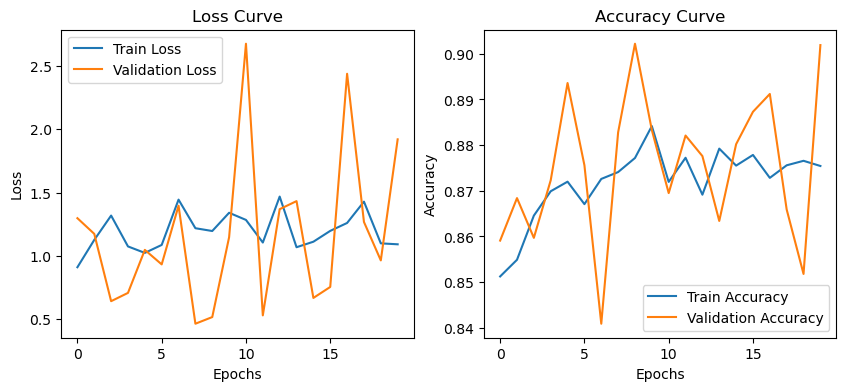

In [14]:
# Plot loss curve
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.legend()

# Plot accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Curve")
plt.legend()

plt.show()